### Importing 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load the dataset into the tool.

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
df.shape

(1599, 12)

### checking for null values

In [5]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### separating dependent and independent variables

In [7]:
x = df.drop(columns = ['quality'], axis = 1)
y = df['quality']

In [8]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### checking for outlier

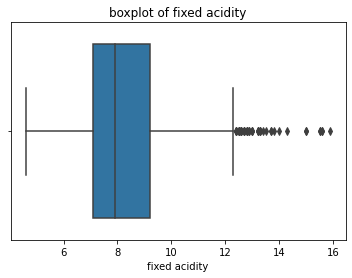

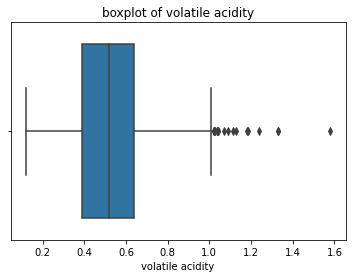

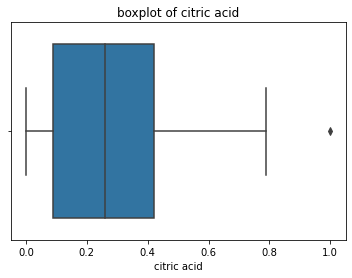

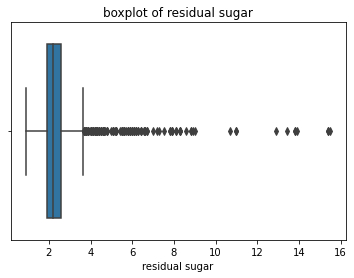

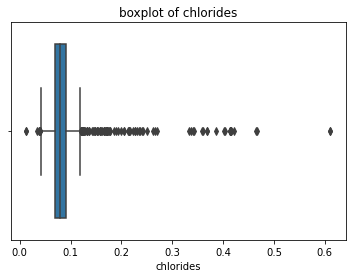

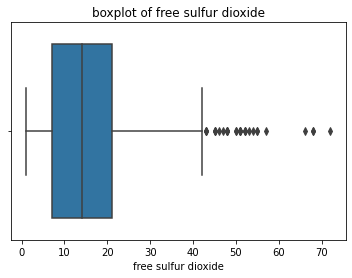

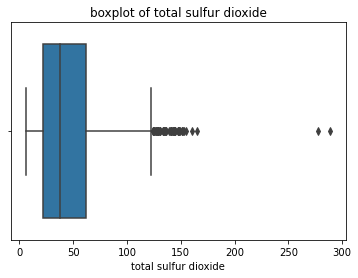

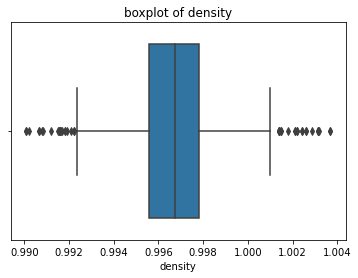

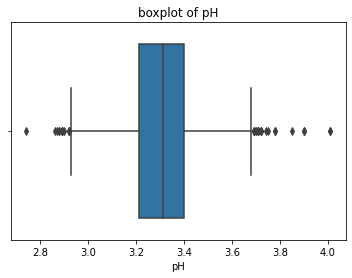

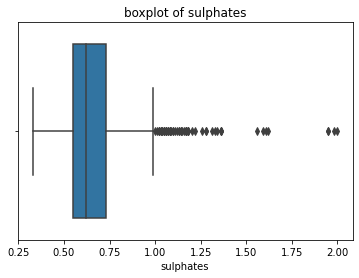

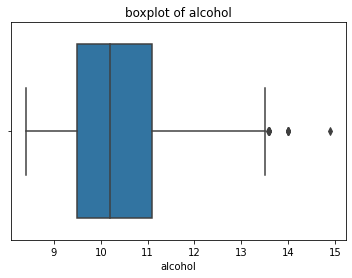

In [10]:
for i in x:
    sns.boxplot(x=df[i])
    plt.title('boxplot of {}'.format(i))
    plt.show()

### treating outliers

In [11]:
for i in x:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    df[i]=np.where(df[i]>upper_limit,upper_limit, df[i])
    df[i]=np.where(df[i]<lower_limit,lower_limit, df[i])

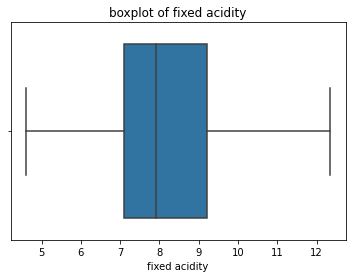

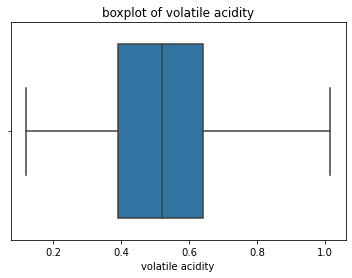

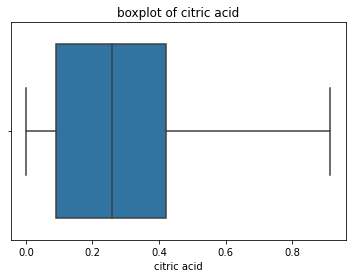

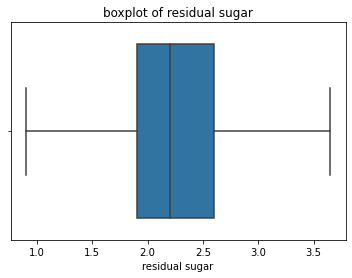

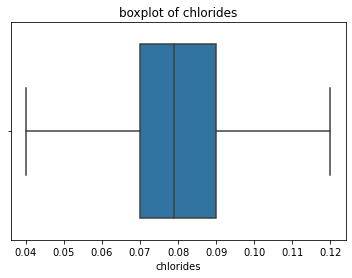

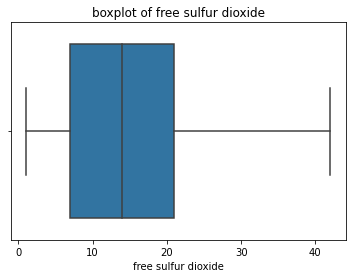

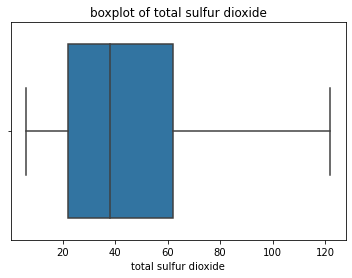

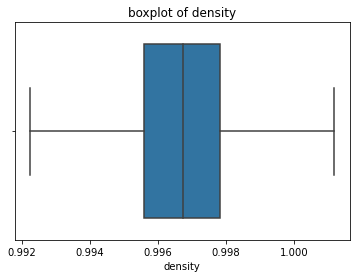

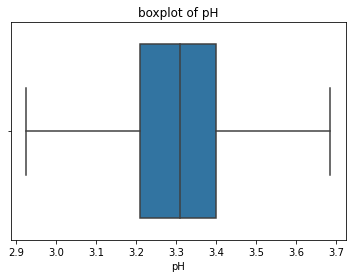

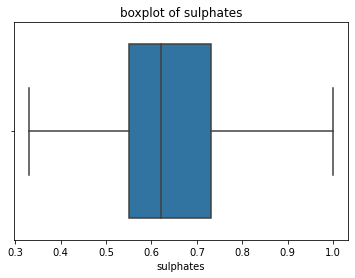

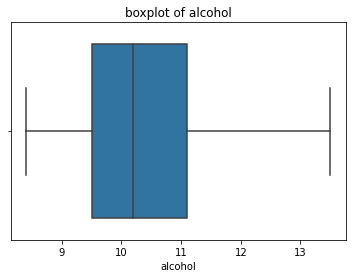

In [12]:
for i in x:
    sns.boxplot(x=df[i])
    plt.title('boxplot of {}'.format(i))
    plt.show()

### univariate analysis

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

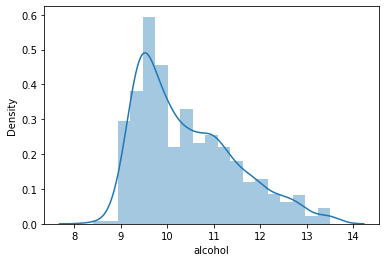

In [13]:
sns.distplot(df['alcohol'])

### bivariate analysis

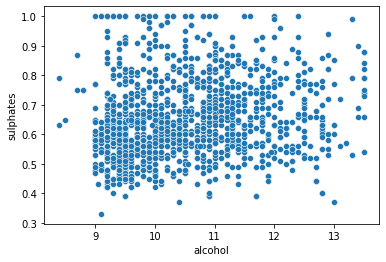

In [14]:
sns.scatterplot(x=df['alcohol'],
               y = df['sulphates'])
plt.show()

### multivariate analysis

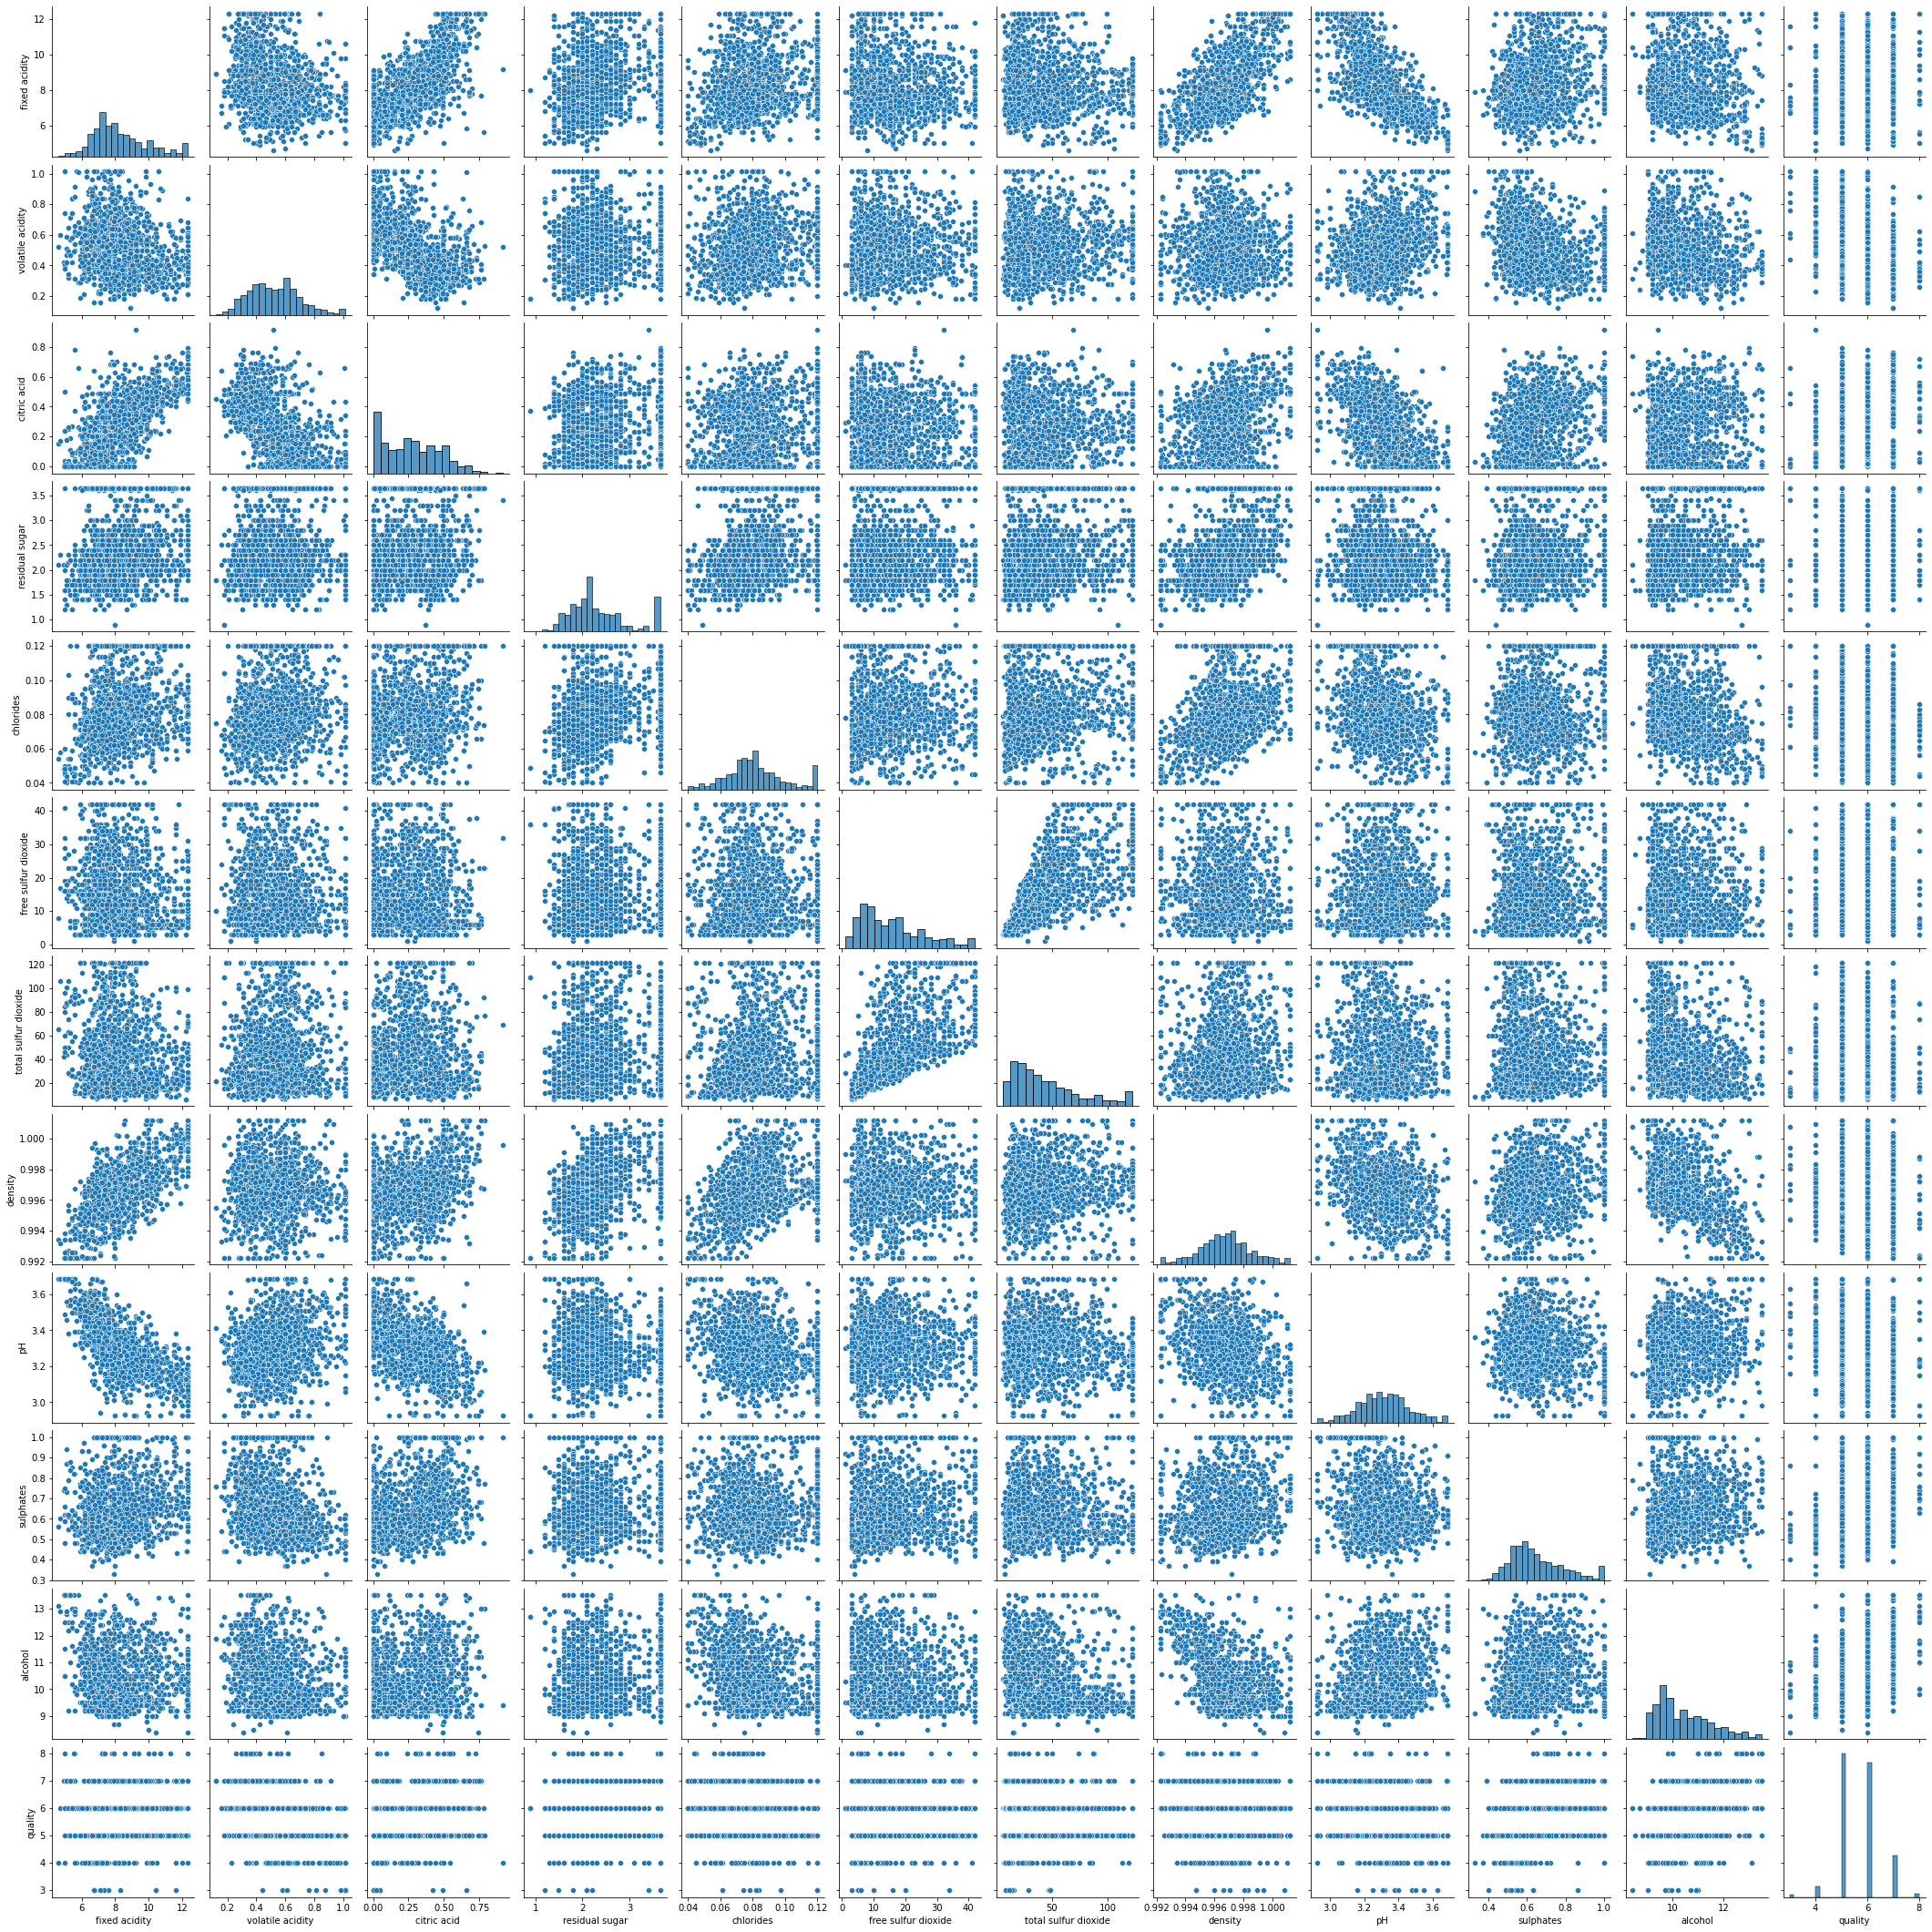

In [15]:
sns.pairplot(df)

### multicollinearity

<AxesSubplot:>

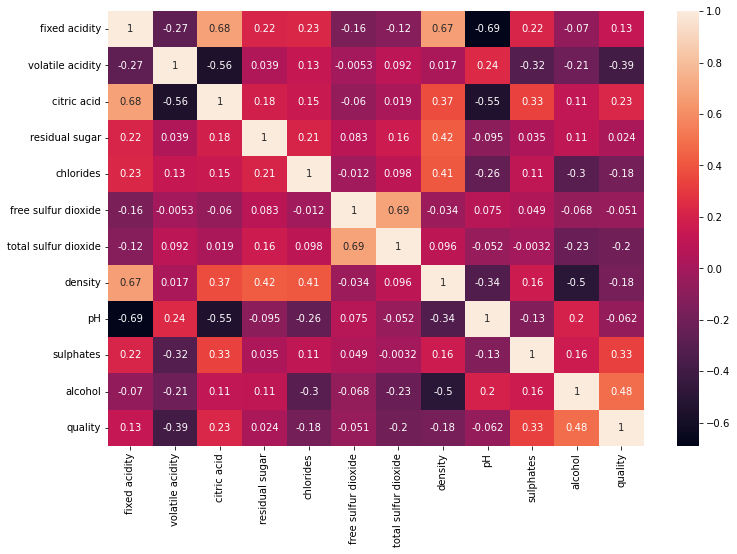

In [16]:
plt.figure(figsize=(12, 8))
cor=df.corr()
sns.heatmap(cor,annot=True)

### scaling dataset

In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [18]:
x_scaled = pd.DataFrame(scale.fit_transform(x), columns= x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


### train_test_split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=5, stratify=y)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1119, 11), (1119,), (480, 11), (480,))

### Model Building

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
pred_train = model.predict(x_train)
pred_train

array([5, 6, 5, ..., 6, 5, 6], dtype=int64)

In [24]:
pred = model.predict(x_test)
pred

array([5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 5, 6, 5, 5, 5, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 6, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 7, 5, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 7, 6,
       6, 6, 6, 7, 5, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5, 3, 6, 5, 6, 5, 3, 5,
       7, 6, 6, 7, 6, 7, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 7, 6, 5, 7,
       5, 5, 6, 5, 5, 7, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 7, 7, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 6, 5, 5,
       6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 6, 5, 6,
       6, 5, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5,
       7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5,
       5, 6, 4, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5,

In [25]:
y_test

48      5
590     5
145     5
1143    6
1027    5
       ..
824     5
326     7
1331    5
818     5
1092    6
Name: quality, Length: 480, dtype: int64

### Evaluating logistic regression model

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve

In [27]:
confusion_matrix(y_test,pred)

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  12,   4,   0,   0],
       [  2,   1, 145,  54,   2,   0],
       [  0,   1,  59, 114,  18,   0],
       [  0,   0,   3,  39,  18,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.71      0.68       204
           6       0.53      0.59      0.56       192
           7       0.45      0.30      0.36        60
           8       0.00      0.00      0.00         5

    accuracy                           0.58       480
   macro avg       0.27      0.27      0.27       480
weighted avg       0.55      0.58      0.56       480



### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC()
classifier = DTC(class_weight= 'balanced')


In [30]:
classifier.fit(x_train, y_train)
pred2 = classifier.predict(x_test)

In [31]:
confusion_matrix(y_test,pred2)

array([[  0,   1,   1,   0,   1,   0],
       [  0,   2,   8,   6,   0,   0],
       [  2,   2, 146,  50,   3,   1],
       [  2,   4,  38, 125,  21,   2],
       [  0,   1,   5,  24,  30,   0],
       [  0,   0,   0,   2,   2,   1]], dtype=int64)

### Evaluating logistic regression model

In [32]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.20      0.12      0.15        16
           5       0.74      0.72      0.73       204
           6       0.60      0.65      0.63       192
           7       0.53      0.50      0.51        60
           8       0.25      0.20      0.22         5

    accuracy                           0.63       480
   macro avg       0.39      0.37      0.37       480
weighted avg       0.63      0.63      0.63       480



### prediction with random values - logistic regression

In [33]:
print(model.predict([[1,1,1,1,1,1,1,1,1,1,1]]))
print(model.predict([[0,1,0,1,1,0,1,0,0,0,0]]))
print(model.predict([[1,0,0,0,0,0,0,1,1,1,1]]))

[6]
[5]
[6]


### prediction with random values - decision tree

In [34]:
print(classifier.predict([[1,1,1,1,1,1,1,1,1,1,1]]))
print(classifier.predict([[0,1,0,1,1,0,1,0,0,0,0]]))
print(classifier.predict([[1,0,0,0,0,0,0,1,1,1,1]]))

[7]
[5]
[7]
